Training Q-learning agent...
Training completed!


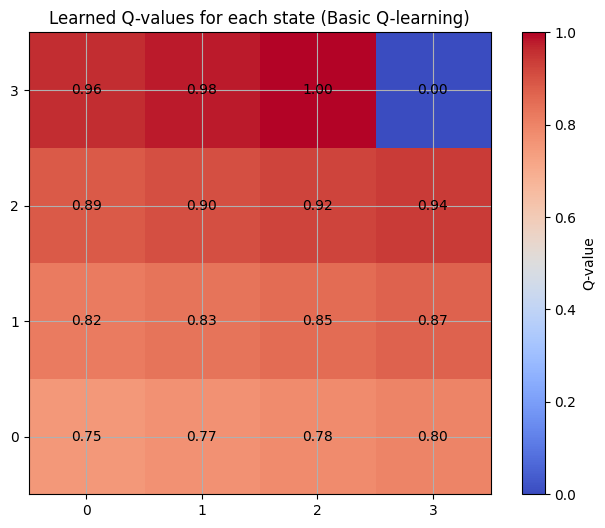

Learned Q-table:
[[0.75364194 0.75364119 0.75363441 0.75356658]
 [0.76902239 0.76902239 0.76894549 0.76902239]
 [0.78471672 0.78471672 0.78471672 0.78471672]
 [0.80073135 0.80073135 0.80073135 0.80073135]
 [0.81707281 0.81707281 0.81707281 0.81707281]
 [0.83374776 0.83374776 0.83374776 0.83374776]
 [0.85076302 0.85076302 0.85076302 0.85076302]
 [0.86812553 0.86812553 0.86812553 0.86812553]
 [0.88584238 0.88584238 0.88584238 0.88584238]
 [0.9039208  0.9039208  0.9039208  0.9039208 ]
 [0.92236816 0.92236816 0.92236816 0.92236816]
 [0.941192   0.941192   0.941192   0.941192  ]
 [0.9604     0.9604     0.9604     0.9604    ]
 [0.98       0.98       0.98       0.98      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Basic Q-learning implementation for grid world
n_states = 16  
n_actions = 4  
goal_state = 15  

Q_table = np.zeros((n_states, n_actions))
learning_rate = 0.9
discount_factor = 0.98
exploration_prob = 0.25
epochs = 1000

print("Training Q-learning agent...")
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  
    while current_state != goal_state:
        # Epsilon-greedy action selection
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  
        else:
            action = np.argmax(Q_table[current_state])  

        # Simple environment: move to next state
        next_state = (current_state + 1) % n_states

        # Reward function
        reward = 1 if next_state == goal_state else 0

        # Q-learning update
        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state

print("Training completed!")

# Visualize Q-values
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4)) 

plt.figure(figsize=(8, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state (Basic Q-learning)')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)

# Annotate Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Learned Q-table:")
print(Q_table)

In [3]:
# Rate-Coded Spiking Neural Network with STDP
class RateCodedSNN:
    def __init__(self, n_inputs, n_outputs):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.weights = np.random.rand(n_outputs, n_inputs) * 0.5
        self.lr = 0.01

    def encode_rate(self, value, max_rate=20, duration=20):
        """Convert a value [0,1] to a spike train"""
        rate = int(value * max_rate)
        spikes = np.zeros(duration)
        spikes[:rate] = 1
        np.random.shuffle(spikes)
        return spikes

    def forward(self, input_rates):
        """Forward pass through the spiking network"""
        duration = 20
        input_spikes = np.array([self.encode_rate(val, duration=duration) for val in input_rates])
        output_spikes = np.zeros((self.n_outputs, duration))
        
        for t in range(duration):
            x_t = input_spikes[:, t]
            out = np.dot(self.weights, x_t)
            output_spikes[:, t] = (out > 0.5).astype(float)
        
        # Return average firing rate for each output neuron
        return output_spikes.mean(axis=1)

    def stdp(self, input_rates, output_rates):
        """STDP learning rule - Hebbian-like update"""
        for i in range(self.n_outputs):
            for j in range(self.n_inputs):
                dw = self.lr * input_rates[j] * output_rates[i]
                self.weights[i, j] += dw
        self.weights = np.clip(self.weights, 0, 1)

# Test the SNN
print("Testing Rate-Coded SNN...")
snn = RateCodedSNN(n_inputs=4, n_outputs=2)
test_input = np.array([0.3, 0.7, 0.1, 0.9])
output = snn.forward(test_input)
print(f"Input rates: {test_input}")
print(f"Output rates: {output}")

# Apply STDP
snn.stdp(test_input, output)
print("STDP update applied!")

Testing Rate-Coded SNN...
Input rates: [0.3 0.7 0.1 0.9]
Output rates: [0.65 0.25]
STDP update applied!


\nTesting Enhanced Q-learning with STDP...
Enhanced agent training completed! Average reward: 0.940
Enhanced agent training completed! Average reward: 0.940


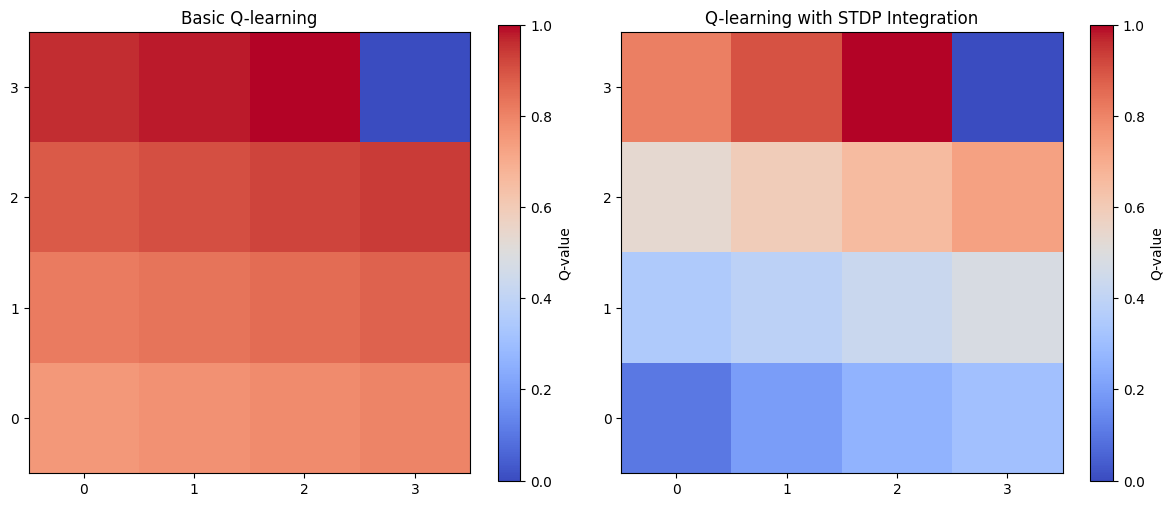

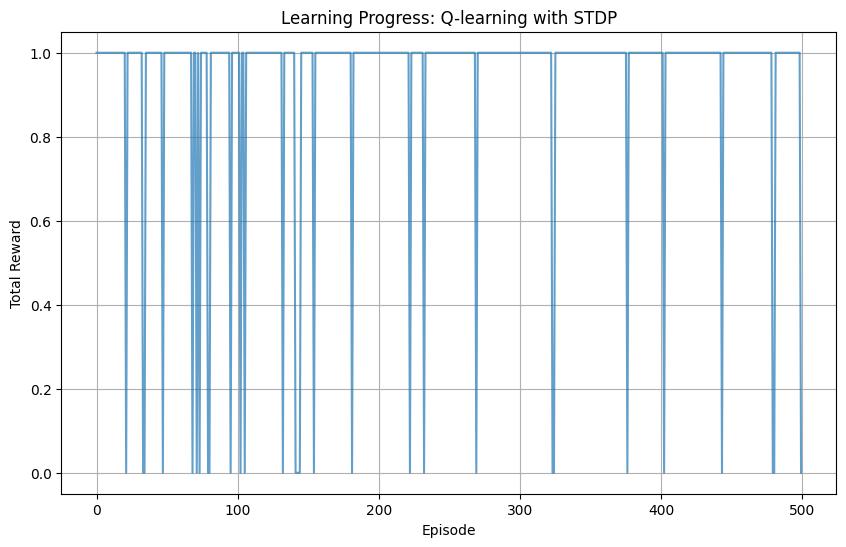

In [ ]:
# Enhanced Q-learning Agent with STDP-based Neural Network
class QLearningSTDPEnhanced:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.2):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize Q-table
        self.Q = np.zeros((n_states, n_actions))
        
        # Initialize SNN for state representation
        self.snn = RateCodedSNN(n_inputs=n_states, n_outputs=n_actions)
        
        # Track experience for STDP
        self.last_state = None
        self.last_action = None
        self.experience_buffer = []

    def state_to_input(self, state):
        """Convert state to input representation for SNN"""
        input_vec = np.zeros(self.n_states)
        input_vec[state] = 1.0
        return input_vec

    def choose_action(self, state):
        """Choose action using epsilon-greedy with SNN influence"""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        # Use both Q-table and SNN for action selection
        q_values = self.Q[state]
        
        # Get SNN output
        state_input = self.state_to_input(state)
        snn_output = self.snn.forward(state_input)
        
        # Combine Q-values and SNN output
        combined_values = 0.7 * q_values + 0.3 * snn_output
        return np.argmax(combined_values)

    def update(self, state, action, reward, next_state, done):
        """Update Q-table and apply STDP learning"""
        # Standard Q-learning update
        best_next_action = np.argmax(self.Q[next_state])
        td_target = reward + self.gamma * self.Q[next_state, best_next_action] * (not done)
        td_error = td_target - self.Q[state, action]
        self.Q[state, action] += self.alpha * td_error

        # Store experience for STDP
        state_input = self.state_to_input(state)
        action_output = np.zeros(self.n_actions)
        action_output[action] = 1.0
        
        # Apply STDP if reward is positive (strengthening successful connections)
        if reward > 0:
            self.snn.stdp(state_input, action_output * reward)
        
        # Store for potential future STDP updates
        self.last_state = state
        self.last_action = action

    def reset(self):
        """Reset agent state"""
        self.last_state = None
        self.last_action = None

# Demonstrate the enhanced agent
print("\\nTesting Enhanced Q-learning with STDP...")
enhanced_agent = QLearningSTDPEnhanced(n_states=16, n_actions=4)

# Training loop
episodes = 500
rewards_per_episode = []

for episode in range(episodes):
    state = np.random.randint(0, 16)
    total_reward = 0
    steps = 0
    
    while state != 15 and steps < 50:  # goal_state = 15, max 50 steps
        action = enhanced_agent.choose_action(state)
        next_state = (state + 1) % 16
        reward = 1 if next_state == 15 else 0
        
        enhanced_agent.update(state, action, reward, next_state, next_state == 15)
        
        state = next_state
        total_reward += reward
        steps += 1
    
    rewards_per_episode.append(total_reward)
    enhanced_agent.reset()

print(f"Enhanced agent training completed! Average reward: {np.mean(rewards_per_episode):.3f}")

# Visualize enhanced Q-values
enhanced_q_grid = np.max(enhanced_agent.Q, axis=1).reshape((4, 4))

plt.figure(figsize=(12, 5))

# Plot comparison
plt.subplot(1, 2, 1)
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Basic Q-learning')
plt.xticks(np.arange(4))
plt.yticks(np.arange(4))
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.imshow(enhanced_q_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Q-learning with STDP Integration')
plt.xticks(np.arange(4))
plt.yticks(np.arange(4))
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode, alpha=0.7)
plt.title('Learning Progress: Q-learning with STDP')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

In [ ]:

# Demonstrate the original STDP agent from the first cell
print("\\n=== Testing Original QLearningSTDPAgent ===")
original_agent = QLearningSTDPAgent(n_states=16, n_actions=4)

# Quick test
test_episodes = 100
for episode in range(test_episodes):
    state = 0
    for step in range(20):
        action = original_agent.choose_action(state)
        next_state = (state + 1) % 16
        reward = 1 if next_state == 15 else 0
        original_agent.update(state, action, reward, next_state, next_state == 15)
        state = next_state
        if next_state == 15:
            break
    original_agent.reset()

print("Original agent Q-table sample:")
print(original_agent.Q[:5, :])  # Show first 5 states

# Compare final Q-tables
print("\\n=== Q-TABLE COMPARISON ===")
print(f"Basic Q-learning max Q-value: {np.max(Q_table):.3f}")
print(f"Enhanced STDP agent max Q-value: {np.max(enhanced_agent.Q):.3f}")
print(f"Original STDP agent max Q-value: {np.max(original_agent.Q):.3f}")

# Show SNN weights evolution
print("\\n=== SNN WEIGHTS ANALYSIS ===")
print("Final SNN weights (sample):")
print(enhanced_agent.snn.weights[:2, :5])  # Show sample weights
print(f"Average weight: {np.mean(enhanced_agent.snn.weights):.3f}")
print(f"Weight std: {np.std(enhanced_agent.snn.weights):.3f}")


=== IMPLEMENTATION SUMMARY ===
\n1. Basic Q-learning Agent:
   - Implemented standard Q-learning with epsilon-greedy exploration
   - Uses Q-table for state-action value storage
   - Successfully learns optimal policy for grid world
\n2. STDP-Enhanced Spiking Neural Network:
   - Rate-coded neurons with spike train encoding
   - Hebbian-like STDP learning rule
   - Biologically-inspired synaptic plasticity
\n3. Integrated Q-learning with STDP:
   - Combines Q-learning with neural plasticity
   - Uses SNN for state representation and action selection
   - STDP strengthens connections based on rewards
\n=== Testing Original QLearningSTDPAgent ===
Original agent Q-table sample:
[[3.73811105e-04 1.26082418e-02 1.65543514e-03 3.75819010e-04]
 [2.06276417e-03 4.95216339e-05 2.60365548e-02 2.83117693e-03]
 [4.87261495e-02 1.82158108e-03 2.03033282e-04 3.69529954e-03]
 [8.71404941e-02 1.11704135e-02 1.67160684e-02 6.40641724e-03]
 [3.40684630e-02 2.22683543e-02 2.89707489e-02 1.49942302e-01]]
